In [5]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results

ckpt_dir = 'exp12_gestures_random_crop_time'

# delays
sweep_params_names = {
    'connection_type': ['f'],
    'delay': ['d'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['tt']
    }

# recurrent
sweep_params_names2 = {
    'connection_type': ['r'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['tt']
    }

# feedforward 4l
sweep_params_names3 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['4l'],
    'tau_m':['ht'],
    'T_freeze_taus':['tt']
    }

In [6]:
def plot_boxplots(df):
    sns.set_theme(style="whitegrid")
    # Create the boxplot with customizations
    
    boxplot = sns.boxplot(data=df, palette="Set3")  # Use a color palette to add color

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10, color='darkred')

    # Add a grid with custom style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Optional: Show median labels on each box
    for i, patch in enumerate(boxplot.artists):
        median_val = df.iloc[:, i].median()
        boxplot.text(i, median_val + 0.5, f'{median_val:.1f}%', ha='center', color='black', fontsize=10)

    return plt.gca()

## Recurrent vs F+D vs Feedforward 4L (100 ms)
Same number of parameters, but f4l has double hidden neurons

0.000619373400695622, 0.0406341552734375%
0.0017809991259127855, 0.012451171875%
0.0017737672897055745, 0.014404296875%
0.0017101360717788339, 0.013916015625%
0.0018216745229437947, 0.008522727526724339%


Text(0, 0.5, 'Spikes per timestep')

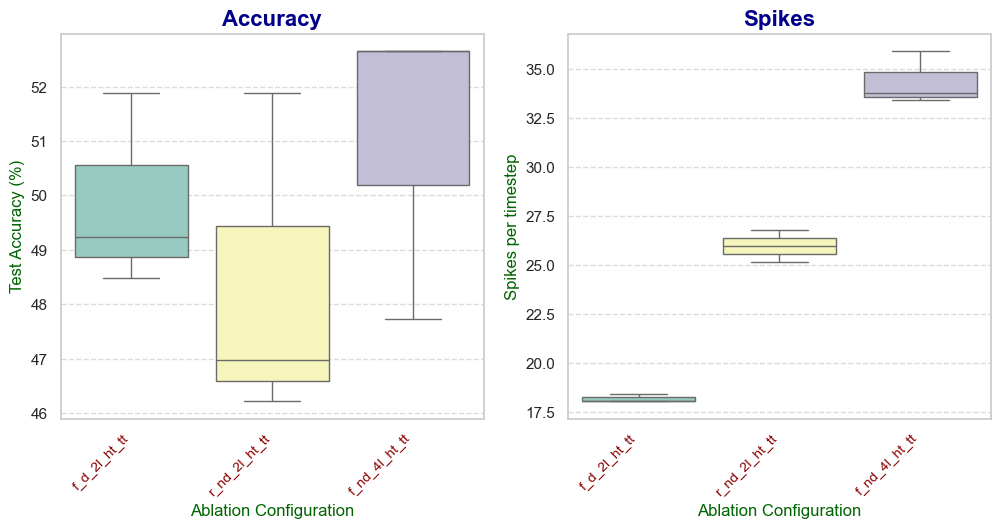

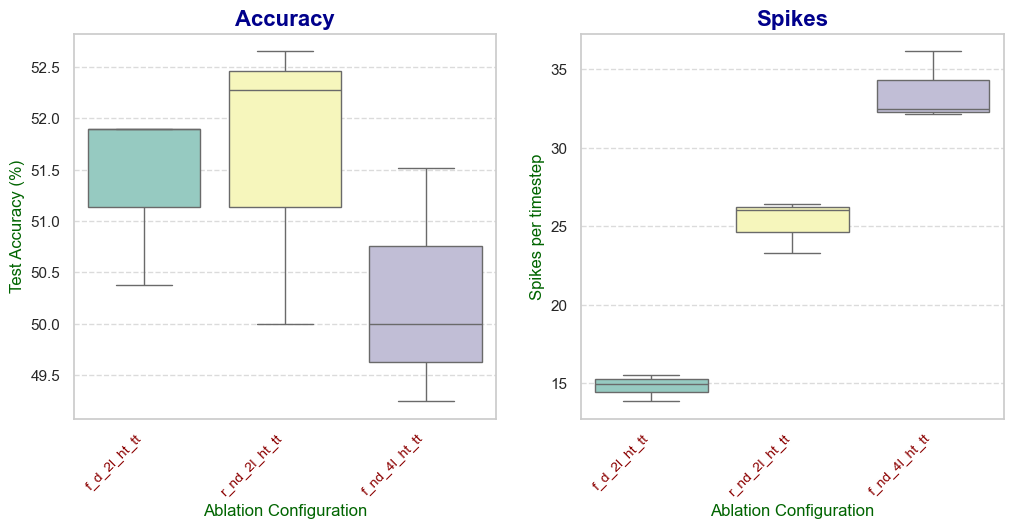

In [8]:
abl_name = 'fixedtest100000.0_'

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, mode='last', ablation_name=abl_name)

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, mode='last', ablation_name=abl_name)

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, mode='last', ablation_name=abl_name)

df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')

abl_name = 'randomtest100000.0_'

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, mode='last', ablation_name=abl_name)

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, mode='last', ablation_name=abl_name)

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, mode='last', ablation_name=abl_name)

df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')

## Recurrent vs F+D vs Feedforward 4L (700 ms)
Same number of parameters, but f4l has double hidden neurons

0.0005549759371206164, 0.042339324951171875%
0.00178716576192528, 0.012451171875%
0.0017484806012362242, 0.016845703125%
0.001974493497982621, 0.01318359375%
0.002471294952556491, 0.017045455053448677%


Text(0, 0.5, 'Spikes per timestep')

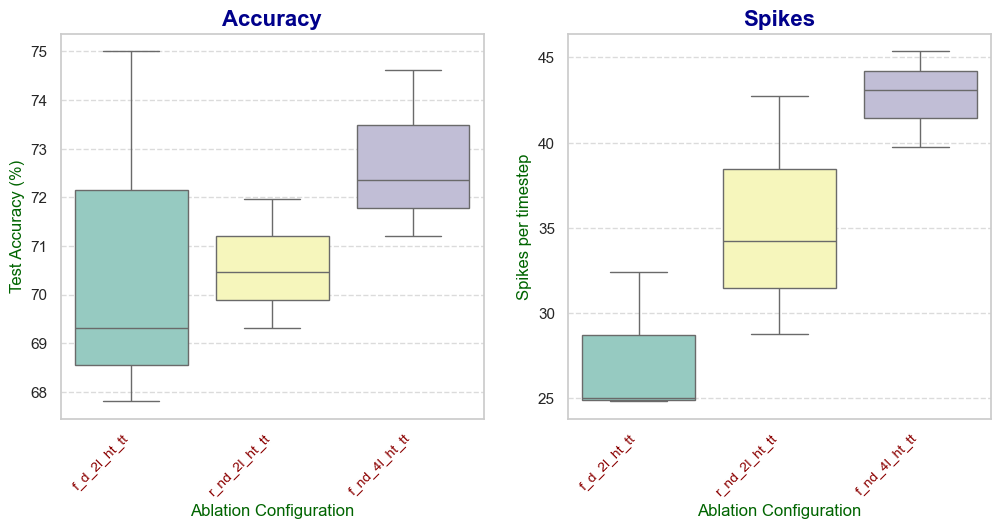

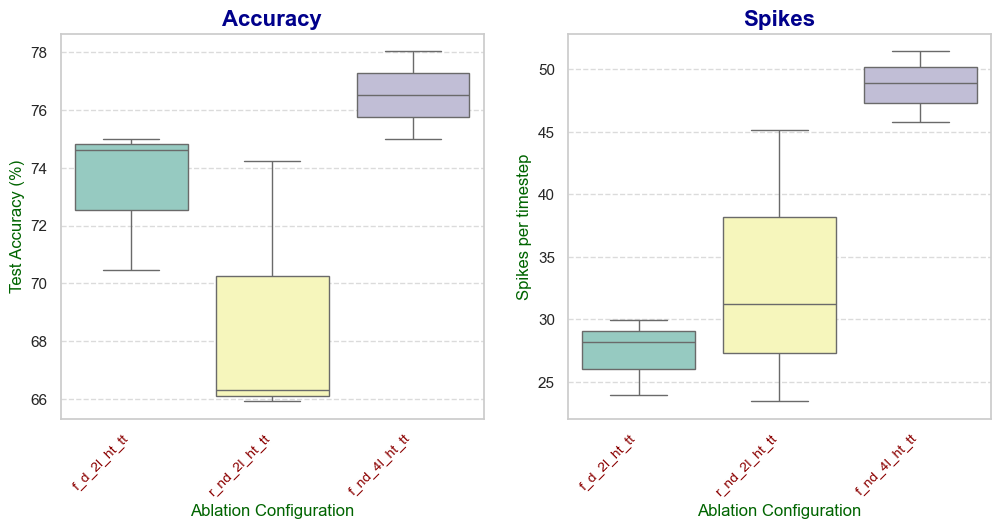

In [9]:
abl_name = 'fixedtest700000.0_'

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, mode='last', ablation_name=abl_name)

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, mode='last', ablation_name=abl_name)

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, mode='last', ablation_name=abl_name)

df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')

abl_name = 'randomtest700000.0_'

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, mode='last', ablation_name=abl_name)

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, mode='last', ablation_name=abl_name)

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, mode='last', ablation_name=abl_name)

df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')

## Recurrent vs F+D vs Feedforward 4L (3000 ms)
Same number of parameters, but f4l has double hidden neurons

0.0005680578178726137, 0.04947662353515625%
0.0017892111791297793, 0.012939453125%
0.0019075117306783795, 0.015625%
0.0018082141177728772, 0.0146484375%
0.0022027220111340284, 0.014204545877873898%


Text(0, 0.5, 'Spikes per timestep')

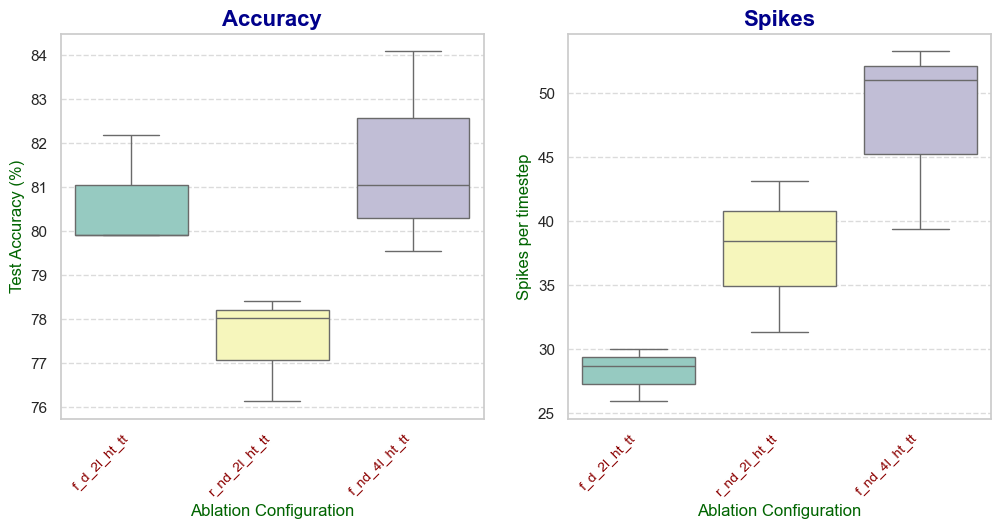

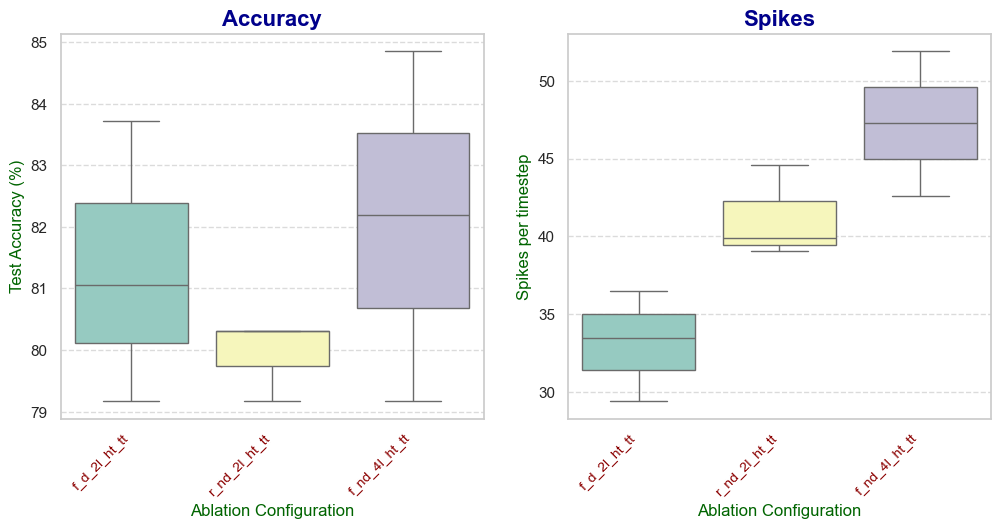

In [10]:
abl_name = 'fixedtest3000000.0_'

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, mode='last', ablation_name=abl_name)

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, mode='last', ablation_name=abl_name)

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, mode='last', ablation_name=abl_name)

df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')

abl_name = 'randomtest3000000.0_'

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=3, mode='last', ablation_name=abl_name)

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=3, mode='last', ablation_name=abl_name)

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, ablation_name=abl_name)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=3, mode='last', ablation_name=abl_name)

df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')

Learning curves

In [10]:
import numpy as np
def plot_losses(nested_loss_lists, label='Mean loss', color='blue', linestyle='-'):

    # Example data: replace `nested_loss_lists` with your actual data
    #nested_loss_lists = tstloss_d['f_d_2l_hm_ft']

    # Ensure all lists have the same length and epoch indices
    epochs = [entry[0] for entry in nested_loss_lists[0]]  # Epochs
    all_losses = [np.array([entry[1] for entry in lst]) for lst in nested_loss_lists]

    # Calculate average and standard deviation
    mean_losses = np.mean(all_losses, axis=0)
    std_losses = np.std(all_losses, axis=0)

    # Plot the average loss curve with error bars
    #plt.figure(figsize=(10, 6))
    plt.plot(epochs, mean_losses, label=label, color=color, linestyle=linestyle)
    #plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2, label='±1 Std Dev')
    plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2)
    #plt.title("Average Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    return plt.gca()

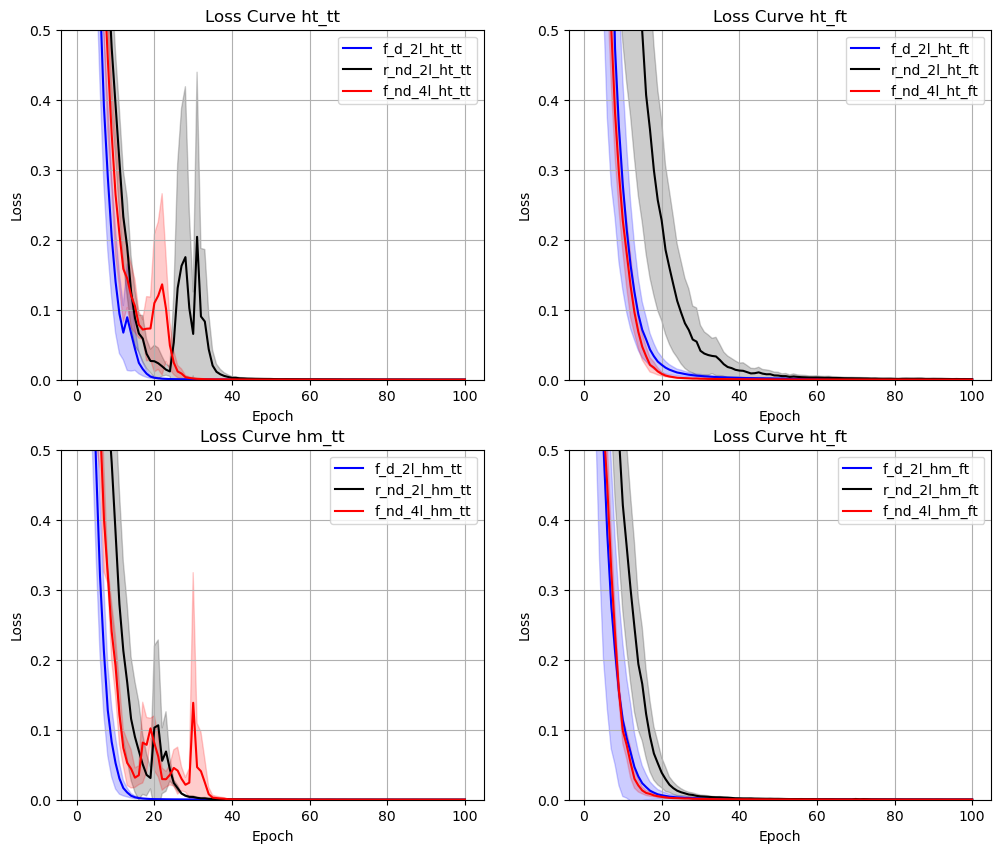

In [14]:
all_train_losses = trnloss_d | trnloss_r | trnloss_f4
filtered_ht_tt = {key:value for key, value in all_train_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_train_losses.items() if 'ht_ft' in key}
filtered_hm_tt = {key:value for key, value in all_train_losses.items() if 'hm_tt' in key}
filtered_hm_ft = {key:value for key, value in all_train_losses.items() if 'hm_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

ylim = 0.5

plt.figure(figsize=(12,10))
plt.subplot(221)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve ht_tt')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(222)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(223)
for key, value in filtered_hm_tt.items():
    plt.title('Loss Curve hm_tt')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(224)
for key, value in filtered_hm_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
# plot_losses(tstloss_d['f_d_2l_hm_ft'], color='red')

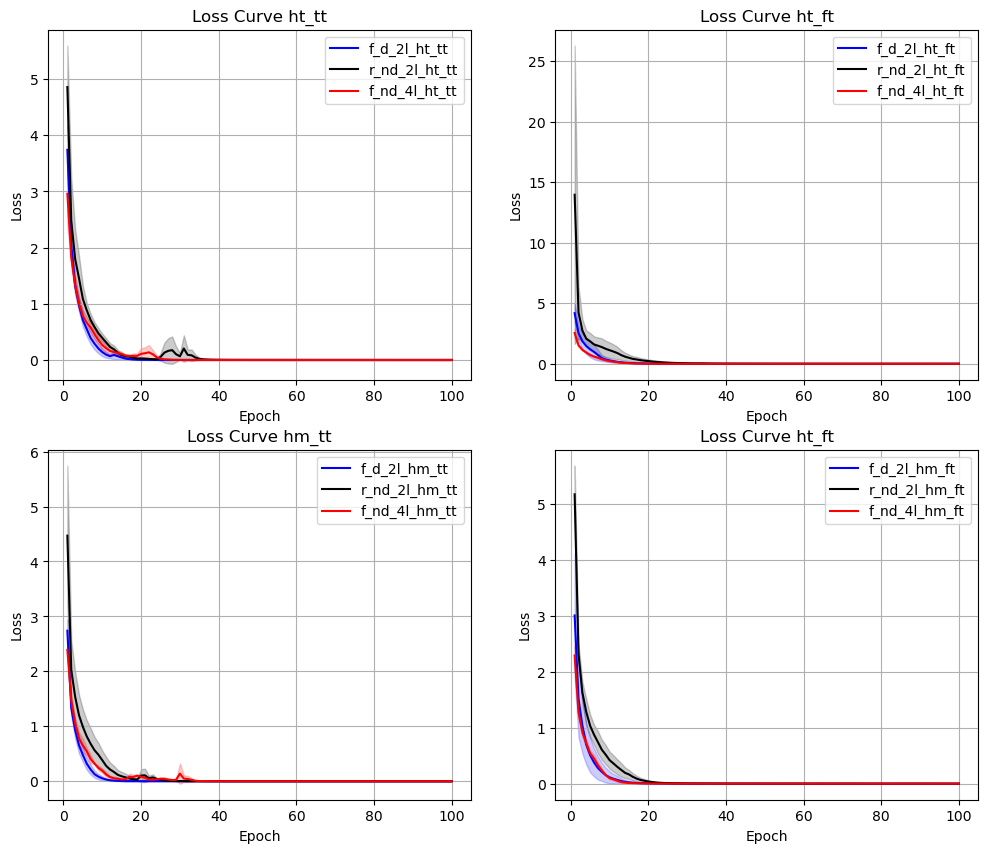

In [17]:
all_train_losses = trnloss_d | trnloss_r | trnloss_f4
filtered_ht_tt = {key:value for key, value in all_train_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_train_losses.items() if 'ht_ft' in key}
filtered_hm_tt = {key:value for key, value in all_train_losses.items() if 'hm_tt' in key}
filtered_hm_ft = {key:value for key, value in all_train_losses.items() if 'hm_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

ylim = 0.5

plt.figure(figsize=(12,10))
plt.subplot(221)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve ht_tt')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
plt.subplot(222)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
plt.subplot(223)
for key, value in filtered_hm_tt.items():
    plt.title('Loss Curve hm_tt')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
plt.subplot(224)
for key, value in filtered_hm_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
# plot_losses(tstloss_d['f_d_2l_hm_ft'], color='red')

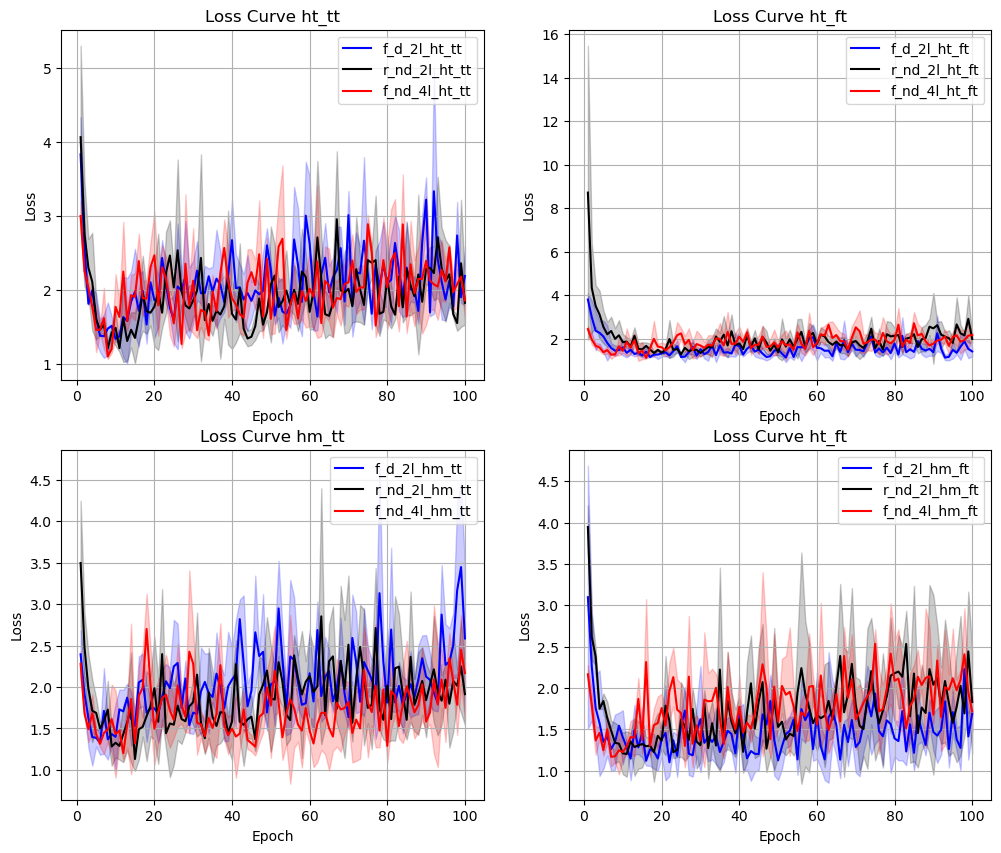

In [16]:
all_train_losses = tstloss_d | tstloss_r | tstloss_f4
filtered_ht_tt = {key:value for key, value in all_train_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_train_losses.items() if 'ht_ft' in key}
filtered_hm_tt = {key:value for key, value in all_train_losses.items() if 'hm_tt' in key}
filtered_hm_ft = {key:value for key, value in all_train_losses.items() if 'hm_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

ylim = 0.5

plt.figure(figsize=(12,10))
plt.subplot(221)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve ht_tt')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
plt.subplot(222)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
plt.subplot(223)
for key, value in filtered_hm_tt.items():
    plt.title('Loss Curve hm_tt')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
plt.subplot(224)
for key, value in filtered_hm_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
    #plt.ylim(0,ylim)
# plot_losses(tstloss_d['f_d_2l_hm_ft'], color='red')